In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import random 

In [3]:
def visualize_data(x,y, title='Random Plot', target=[0], label =['Feature 1', 'Feature 2']):
    colormap = np.array(['r', 'g', 'b'])
    plt.scatter(x,y, c= colormap[target])
    plt.title(title)
    plt.xlabel(label[0])
    plt.ylabel(label[1])
    plt.axhline(0, color='b')
    # Add a legend with roll numbers
    plt.legend([f'Roll [5,9]'])
    plt.show()

def calculate_cov_eig(new_x):
    cov_mat = np.cov(new_x.T)
    eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
    print(f'Covariance Matrix: {cov_mat}\n Eigen Values: {eigenvalues}\n Eigen Vectors: {eigenvectors}')
    return cov_mat,  eigenvalues, eigenvectors

def apply_pca(eigen_row, x):
    pca_data = np.matmul(eigen_row, x.T)
    pca_data= pca_data.T
    return pca_data

In [4]:
x1 = np.random.randn(20)
x2 = np.random.randn(20)

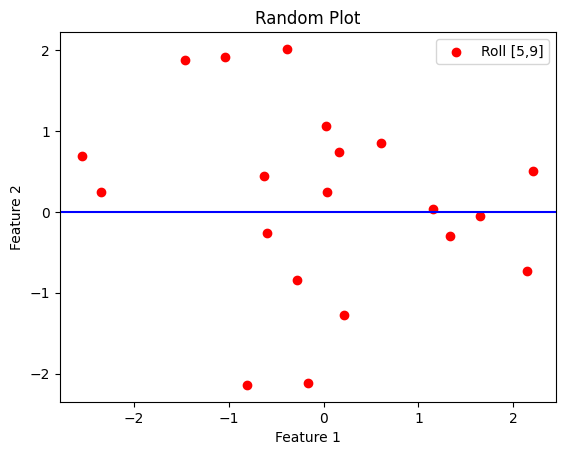

In [5]:
visualize_data(x1,x2)

In [14]:
D = np.random.rand(2,2)
scaler = StandardScaler()
d = scaler.fit_transform(D)

x = [x1,x2]
x = np.array(x).T
print(D)

[[0.43789835 0.51377176]
 [0.73045891 0.42769569]]


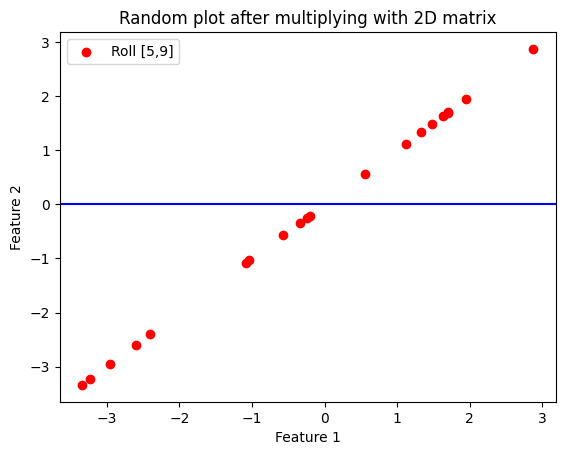

In [11]:
new_x = np.matmul(x, d)
visualize_data(new_x[:,0], new_x[:,1], 'Random plot after multiplying with 2D matrix')

In [18]:
cov, eigenvalues, eigenvectors,  = calculate_cov_eig(new_x)

Covariance Matrix: [[ 3.06169736 -3.06169736]
 [-3.06169736  3.06169736]]
 Eigen Values: [ 6.12339472e+00 -4.44089210e-16]
 Eigen Vectors: [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


In [19]:
data = apply_pca(eigenvectors[:,1] , new_x)

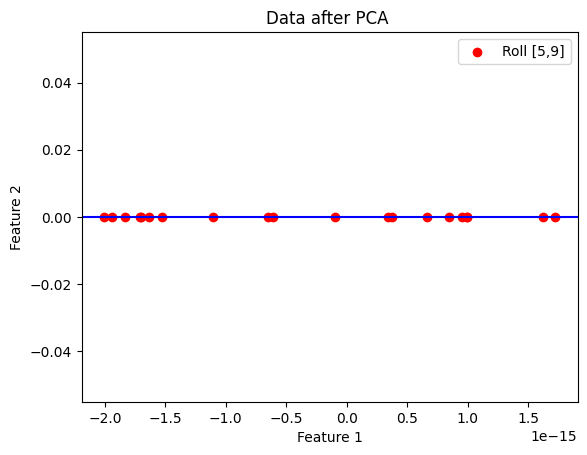

In [20]:
visualize_data(data, np.zeros_like(data), 'Data after PCA ')

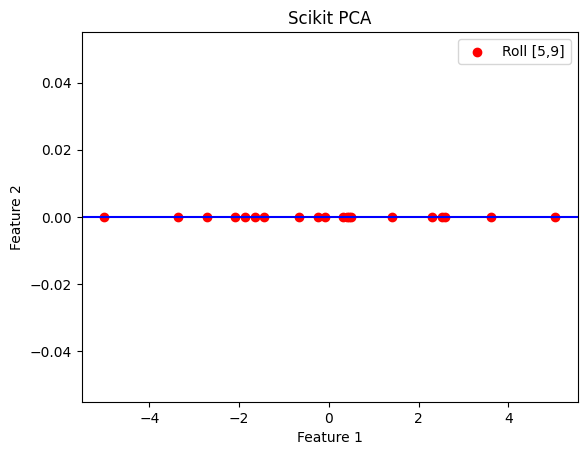

In [21]:
#use of skleannr 
from sklearn.decomposition import PCA

# Assume you have a dataset called `data` with dimensions (m, n)

# Create an instance of PCA with the desired number of components
n_components = 1  # Specify the number of principal components you want to retain
pca = PCA(n_components=n_components)

# Fit the PCA model to the data
pca.fit(new_x)

# Transform the data to the lower-dimensional space
transformed_data = pca.transform(new_x)

# Access the explained variance ratio
visualize_data(transformed_data, np.zeros_like(transformed_data), 'Scikit PCA')